In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
import time
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\T\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('airline-passengers.csv')

In [3]:
df.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.tail(5)

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


<function matplotlib.pyplot.show(close=None, block=None)>

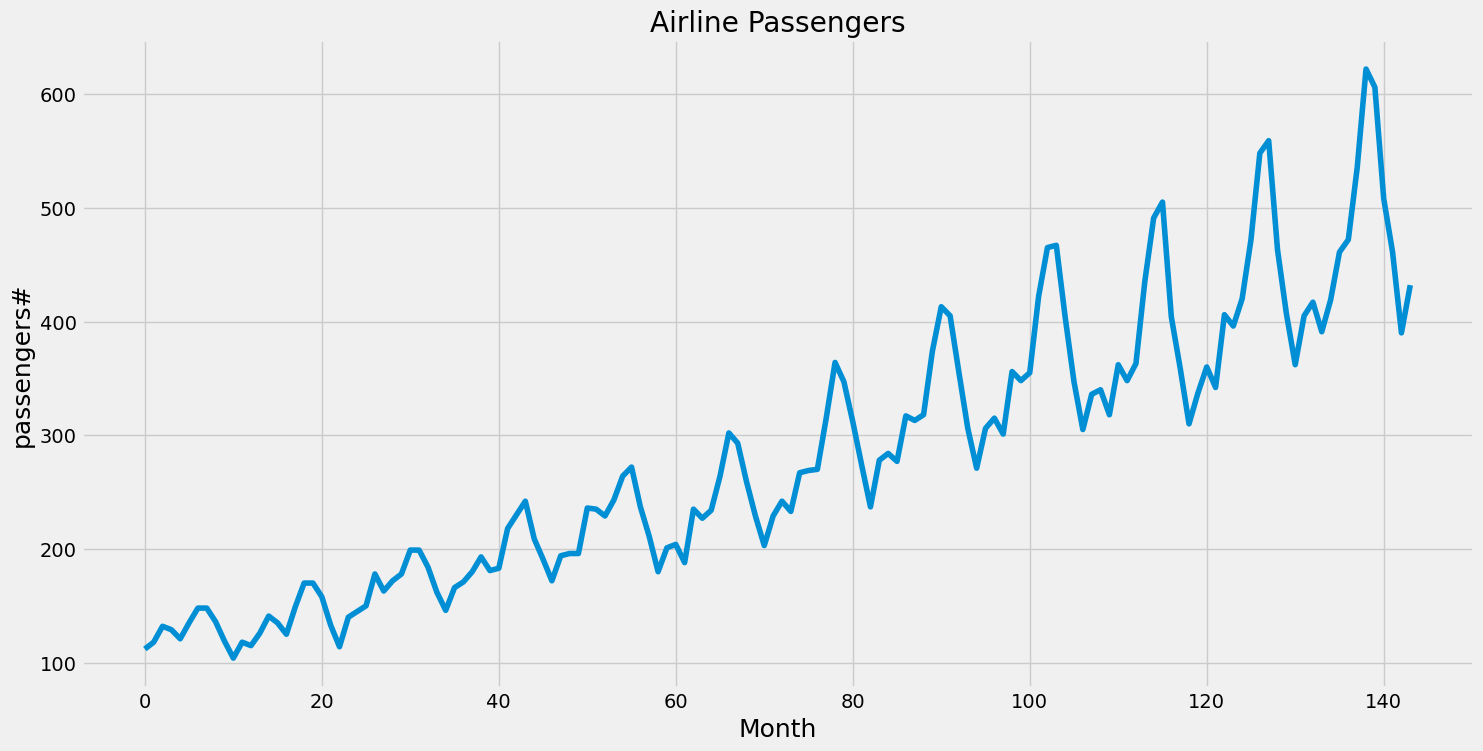

In [5]:
plt.figure(figsize=(16,8))
plt.title('Airline Passengers')
plt.plot(df['Passengers'])
plt.xlabel('Month', fontsize=18)
plt.ylabel('passengers#', fontsize=18)
plt.show

In [6]:
##extracting just the price column 

data =df.filter(['Passengers']) 

In [7]:
##has to be in an array for RNN

dataset = data.values 

In [8]:
##taking 80% of the data 

##Math is used to round the number because we will get a decimel if not used 

training_data_len = math.ceil( len(dataset) * .8 ) #empty

In [9]:
training_data_len    ###116 rows taken for training 

116

In [10]:
##normally defaults to 0 and 1 - neural networks require the data to be in the same range

scaler = MinMaxScaler(feature_range=(0,1))

dataset = scaler.fit_transform(dataset)

In [11]:
#scaled_data
dataset

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [12]:
#starting at observation 0 and training data up to the 116(training length) created above

#And the comma is saying I want all the features

train_data = dataset[0:training_data_len , :]   

In [13]:
x_train =[]  ##created to hold independent data
y_train =[]  ##created to hold dependent data

In [14]:
for i in range(4, len(train_data)):##len(train_data) is saying keep going until you get to the end of the train data/ you start at 4
    x_train.append(train_data[i-4:i,0])##starting 4 spaces before where we are(i-4) to i  --will start at 0 and keep counting next time
    y_train.append(train_data[i,0]) ##index 4 is used - this is the observation (5th space)
    

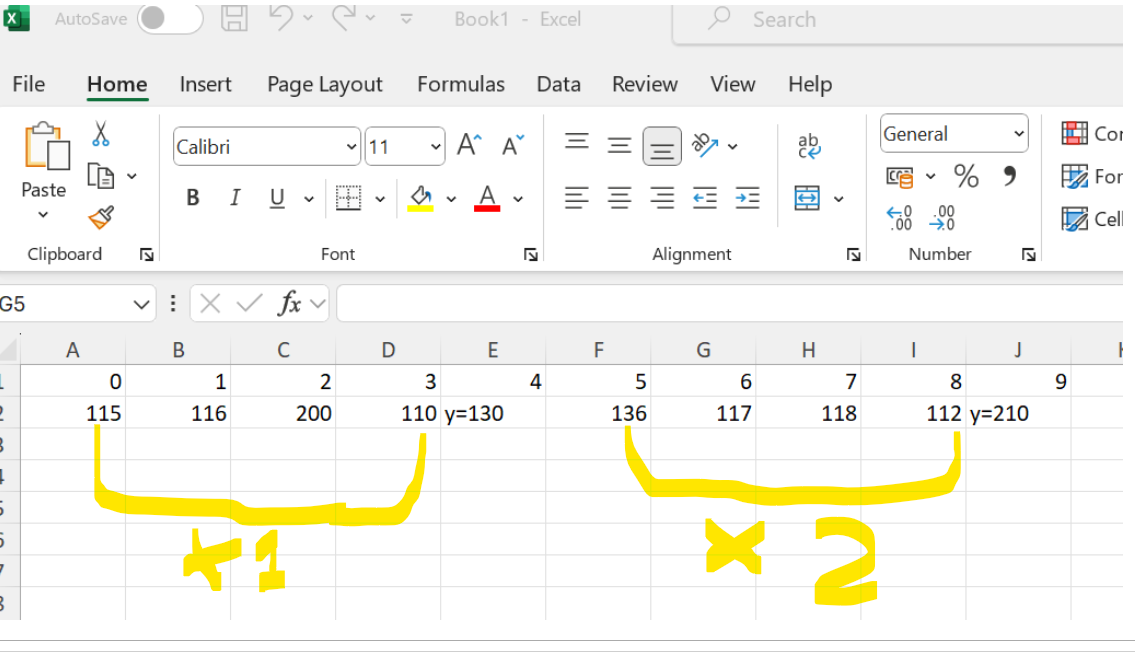

In [15]:
from IPython.display import Image
Image(filename ='RNN.png', width = 600, height = 300)

In [16]:
##numpy used to get the data in the required array format

x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
##neural networks must be in a 3 dimensional format

##first part of the tuple x train, the second part the other dimenion 1 remember its in 2 dimensions, 
#then 1 is just adding the third dimesion 

x_train =np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1)) 

x_train.shape

(112, 4, 1)

In [18]:
y_train.shape

(112,)

In [19]:
#112 observations(independent part)
#4 features(dependent) 
#1 - addtional dimension for neural network 

In [20]:
#Building the neural network 

##return sequence true because its an rnn - you must go back through

##10 is 10 neurons 

#(x_train.shape[1], 1))) the expected shape for model

#model.add(Dense(5)) ##adds transformations 
#before the final output/helps the machine generalize by bringing the output from 10 to 5 


model = Sequential()
model.add(LSTM(10, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(LSTM(10, return_sequences = False))
model.add(Dense(5)) ##adds transformations before the final output/helps the machine generalize by bringing the output from 10 to 5 
model.add(Dense(1)) 


C:\Users\T\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
#model.compile(optimizer='adam', loss = 'mean_squared_error')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
  #Batch size is the amout of data fed to the model - smaller batches leads to better learning 
  #Epochs is how often the data passes through the model - too many leads to overfitting 
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0190 - loss: 0.8728    
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0162 - loss: 0.6031     
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0071 - loss: 0.5661     
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0024 - loss: 0.5624     
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0190 - loss: 0.5475     
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0024 - loss: 0.5522     
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0019 - loss: 0.5397     
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0089 - loss: 0.5321     
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0190 - loss: 0.5373     
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0162 - loss: 0.5363     


In [23]:
test_data = dataset[training_data_len -4: , :]  


###total data - training data

##test data set contains data from 116 to 144#

In [24]:
##creating X_test and y_test

x_test = []
y_test = dataset[training_data_len:, :]

In [25]:


for i in range(4,len(test_data)):
    x_test.append(test_data[i-4:i, 0])

In [26]:
##needs to be into an array that will be in 2D -- 

x_test = np.array(x_test)

In [27]:
##data needs to be in 3D for RNN model

x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [28]:
#making preidctions and storing it in predictions
predictions = model.predict(x_test)  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


In [29]:
##this will bring the data back from the 0,1 predictions

predictions = scaler.inverse_transform(predictions) 

In [30]:
rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test),predictions)) ##average between the true and the predicted 
r2_value = r2_score(scaler.inverse_transform(y_test),predictions) ##measures the proportion of the dependent variable that is predictable by the independent variable(s) a value of 1 means 100% of the dependent variable results can be explained by independent variable(s)

In [31]:
print("Root Mean Square Error: ", rmse)
print("R^2 Value: ", r2_value)

Root Mean Square Error:  92.94645546959822
R^2 Value:  -0.400688031929727


In [32]:
train = data[:training_data_len] #####################################whats the difference here/ looks like 80% of the data
valid = data[training_data_len:] ###20% of data that was split off - actual x test data(remaining portion of the data)
valid['Predictions'] = predictions  ###predictions made on the x-test

C:\Users\T\AppData\Local\Temp\ipykernel_19892\927710945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions  ###predictions made on the x-test


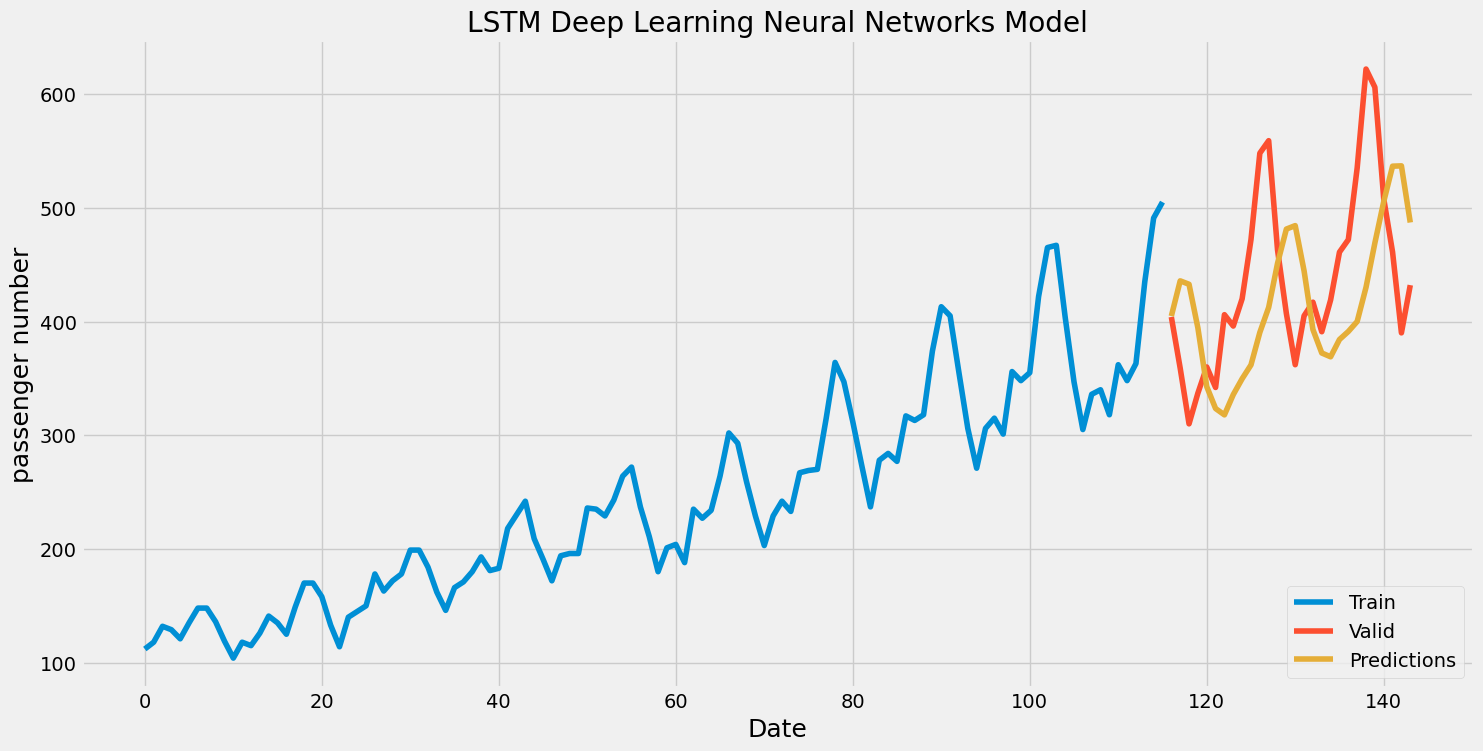

In [33]:
plt.figure(figsize=(16,8))
plt.title('LSTM Deep Learning Neural Networks Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('passenger number', fontsize=18)
plt.plot(train['Passengers'])
plt.plot(valid[['Passengers', 'Predictions']])###plotting the price with the predictions
plt.legend(['Train', 'Valid', 'Predictions'], loc = 'lower right')
plt.show()